In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from collections import Counter

In [43]:
trainD = pd.read_csv('train.csv')
testD = pd.read_csv('test.csv')

Tréningový dataset pozostáva z 2800 záznamov a 40 atribútov<br><br>
<b>Typy atribútov v počtoch:</b><br>
object: 29<br>
float: 6<br>
int: 5

In [12]:
print(trainD.info(max_cols=0))
trainD.dtypes.value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Columns: 40 entries, Unnamed: 0 to personal_info
dtypes: float64(6), int64(5), object(29)
memory usage: 875.1+ KB
None


object     29
float64     6
int64       5
dtype: int64

# Age + date_of_birth

date_of_birth    age
2052    1563-06-03  455.0

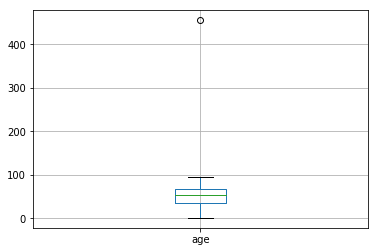

In [13]:
trainD.boxplot(column='age')
trainD[trainD['age'] == 455].loc[:,['date_of_birth','age']]

Dataset obsahuje záznam s outlierom majúc 455 rokov, ktorý korešponduje s dátumom narodenia, čo znamená, že atribút age neuvádza v ktorom roku človeka boli testy vykonané, roky sa počítali len vzhľadom k určitému času. 
Návrh riešenia podľa poskytnutých informácií o zdroji datasetu alebo z predspracovania dátumov:
- Ak by sa táto skutočnosť vzťahovala aj na ostatné záznamy rovnakým spôsobom, tak atribút date_of_birth je redundantný kedže je zahrnutý v atribúte age. Niesol by len informáciu, do koľkého roku človeka mohol byť test vykonaný, preto vychýlené hodnoty by som nahradzoval napr. rokom 95. 
- Ak by sa to vzťahovalo len čiastočne (počítané v rámci odlišného určitého času), zistil by som pre každý záznam o akom čase sa jedná cez kombináciu týchto atribútov a transformoval roky tak, aby sa vzťahovali k rovnakému času.
- Ak by sa to nepočítalo vzhľadom na čas, ale v roku v ktorom sa test vykonal, vychýlené hodnoty by som nahrádzal najbližšie pravdepodobnou hodnotou -> zaokruhleným mediánom. 
 
Pre krajšiu vizualizáciu bol prvok s 455 rokmi odfiltrovaný. Atribút obsahuje dátový typ float, ktorý by bolo taktiež vhodne pretypovať na integer.<br><br>
<b>Distribúcia a histogram</b><br>

count    2799.00000
mean       51.84423
std        20.46116
min         1.00000
25%        36.00000
50%        54.00000
75%        67.00000
max       455.00000
Name: age, dtype: float64

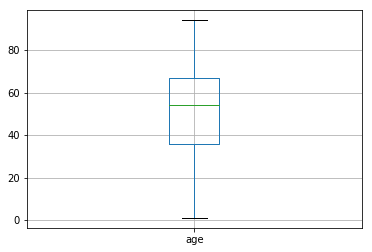

In [14]:
trainD[trainD['age'] < 100].boxplot(column='age')
trainD.age.describe()

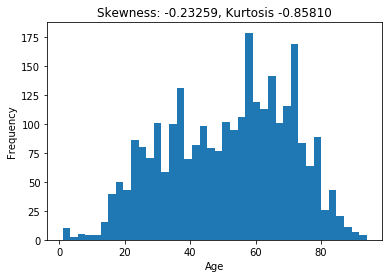

In [15]:
filt = trainD[trainD['age'] < 100]         # odfiltrovanie zaznamu so 455 rokmi
plt.title("Skewness: %.5f, Kurtosis %.5f" % (stats.skew(filt['age']), (stats.kurtosis(filt['age']))))
plt.xlabel('Age')
filt.age.plot(kind='hist', bins = 40, x = 'age')

Z príkazu deskriptívnej štatistiky je vidieť, že je napočítaných 2799 hodnôt a jeden záznam je teda nevyplnený. Nevyplnené hodnoty by mohli byť vyplňované opäť zaokruhlenými mediánmi.<br>
Taktiež je vidieť spolu s <b>boxplotom a histogramom</b> ako sú tieto hodnoty distribuované. Väčší rozsah hodnôt sa pohybuje v medzi-kvartiloch Q1-Q2 (hodnotovo 18) ako v Q2-Q3 (hodnotovo 13). <br>Tomu zodpovedá aj <b>Skewness</b>, ktorý je aj kvôli tomu záporný a hovorí o tom, že obsahuje väčší rozsah hodnôt nalavo od mediánu v histograme.<br>
Záporná hodnota <b>Kurtosis</b> nám hovorí o tom, že hodnoty sú rovnomernejšie rozpoložené od normálneho rozdelenia. Na histograme je vidieť, že rozpoloženie sa zásadne začne meniť pri rokoch 0-20 a 80-100.<br>
Neboli zpozorované žiadne korelácie s ostatnými atribútami a môže preto slúžiť ako dobrý prediktor (najmä vtedy ak atribút age vyjadruje v ktorom roku človeka otestovanie nastalo.<br>

<b>date_of_birth</b> atribút obsahuje 3 rôzne formáty dátumov. Je potrebné transformovať dátumy buď na minimálne existujúci formát DD-MM-YY (ktorého je aj najväčší počet), alebo ak sa dá zistiť, z akého storočia pochádzajú DD-MM-YY formáty (pravdepodobne 20.), tak sa môžu transformovať na presnejšie uvedený rok (YYYY-MM-DD) ak chceme mať zahrnuté aj iné storočia.


In [16]:
trainD[['date_of_birth']].iloc[5:12]

date_of_birth
5   1975-02-14 00 00 00
6            1952/01/14
7            1967-07-24
8            1959-12-20
9            1941-06-11
10           11/12/1998
11  1939-07-13 00:00:00

# TSH
<b>Distribúcia a histogram

count    2516.000000
mean        4.672150
std        21.449453
min         0.005000
25%         0.440000
50%         1.400000
75%         2.600000
max       478.000000
Name: TSH, dtype: float64


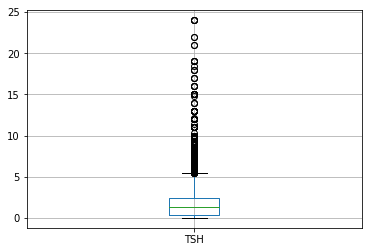

In [17]:
filt = trainD[trainD['TSH'] < 25]
print(trainD.TSH.describe())       # bez filtracie
filt.boxplot(column='TSH')         # filtrovany boxplot

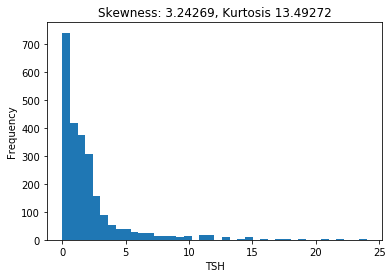

In [18]:
plt.title("Skewness: %.5f, Kurtosis %.5f" % (stats.skew(filt['TSH']), (stats.kurtosis(filt['TSH']))))
plt.xlabel('TSH')
filt.TSH.plot(kind='hist', bins = 40)

In [19]:
trainD[trainD['TSH'] > 25].TSH.describe()

count     75.000000
mean      85.458667
std       92.207843
min       26.000000
25%       35.500000
50%       51.000000
75%       99.500000
max      478.000000
Name: TSH, dtype: float64

Na boxplote je vidieť, že atribút obsahuje veľa outlierov a to je ešte odflitrovaný hodnotami vyššími ako 25. Tých je napočítaných až 75. Pri takejto veľkej rozptýlenosti je vhodné hodnoty znormalizovať pre algoritmy strojového učenia napr. odmocninou. Počet vyplnených hodnôt je 2516 z 2800, nevyplnené hodnoty môžu byť nahradené mediánom. Tento atribút očividne neobsahuje žiadne vychýlené hodnoty kedže vychádzajú s exponenciálnym klesaním, čomu zodpovedajú aj metriky vysokého Skewness a Kurtosis na histograme.<br>

# T3 + T4U
<b>Histogram, vzťahy a distribúcia

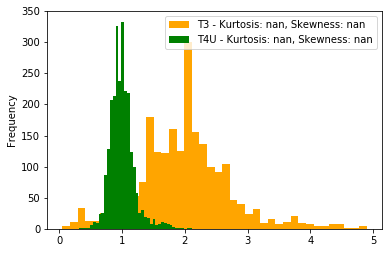

In [20]:
labels = []   # kurt(sample, fisher=False)
filt = trainD[trainD['T3'] < 5]

labels.append("T3 - Kurtosis: %.5f, Skewness: %.5f" % (stats.kurtosis(trainD['T3']), stats.skew(trainD['T3'])))
labels.append("T4U - Kurtosis: %.5f, Skewness: %.5f" % (stats.kurtosis(trainD['T4U']), stats.skew(trainD['T4U'])))
filt.T3.plot(kind='hist', bins = 40, color="Orange")
trainD.T4U.plot(kind='hist', bins = 40, color="Green")
plt.legend(labels)


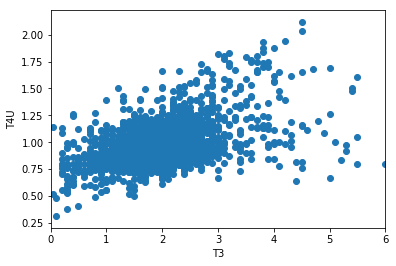

In [21]:
plt.xlim(0, 6)  # decreasing time
plt.xlabel('T3')
plt.ylabel('T4U')
plt.scatter(trainD.T3, trainD.T4U) # kategoricke - spojite potom.. lepsie cez boxploty a histogramy

               T4U           T3
count  2503.000000  2215.000000
mean      0.997912     2.024966
std       0.194390     0.824600
min       0.310000     0.050000
25%       0.880000     1.600000
50%       0.980000     2.000000
75%       1.080000     2.400000
max       2.120000    10.600000


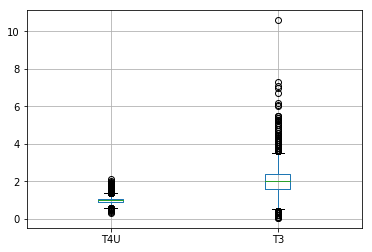

In [22]:
print(trainD[['T4U', 'T3']].describe())
trainD.boxplot(['T4U', 'T3'])

Atribúty T3 T4U majú určitú podobnosť v distribuovaných hodnotách. T4U sa pohybuje v hodnotách 0.3 - 2.12, pričom T3 hodnoty pohybujú od 0,05 po 10,6. Rast týchto hodnôt je možné sledovať cez scatter plot a mohol by vyjadrovať lineárnu závislosť aj keď len s veľkou odchylkou. Taktiež hodnoty v kvartiloch(25/50/75) sú u T3 približne 2 krát väčšie ako u T4U. Chýbajúce hodnoty by sa mohli dopĺňať na základe mediánu či priemeru a prípadne aj druhého vyplneného atribútu.

# TT4, FTI a TBG 
FTI a TBG - potreba predspracovania atribútov (typ object na integer). Chýbajúce hodnoty sú reprezentované otáznikom, atribút TBG pozostáva len z nich, nemá teda žiadnu hodnotu a môže sa zahodiť. Pri FTI a TT4 sa môže pristupovať podobným spôsobom riešenia ako v predchádzajúcich atribútoch<br><br>

# fnlwgt
<b>Distribúcia</b>

count    2.800000e+03
mean     1.915988e+05
std      1.120316e+05
min      1.228500e+04
25%      1.179488e+05
50%      1.797535e+05
75%      2.409325e+05
max      1.484705e+06
Name: fnlwgt, dtype: float64


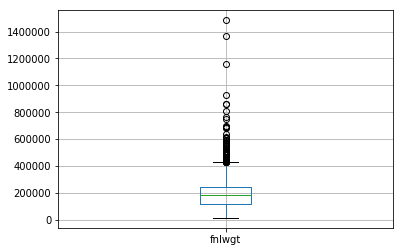

In [23]:
print(trainD['fnlwgt'].describe())
trainD.boxplot(['fnlwgt'])

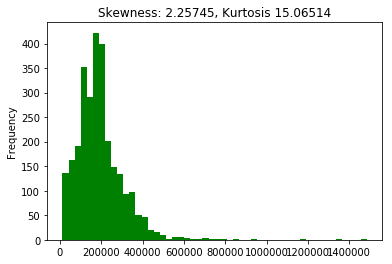

In [24]:
plt.title("Skewness: %.5f, Kurtosis %.5f" % (stats.skew(trainD['fnlwgt']), (stats.kurtosis(trainD['fnlwgt']))))
trainD.fnlwgt.plot(kind='hist', bins = 50, color="Green")

Atribút neobsahuje žiadne chýbajúce hodnoty a nemá v sebe žiadne chybové hodnoty. Neboli nájdené žiadne závislosti s inými numerickými atribútami a môže byť dobrým prediktorom. Obrázky poukazujú na distribúciu hodnôt, ktoré sú naklonené na lavú stranu a od hodnoty 30K začínajú rapídne klesať. Pri takýchto veľkých hodnotách by bolo vhodné použiť normalnizáciu napr. logaritmom.

# education-num

count    2800.000000
mean       12.720714
std       330.168277
min     -1500.000000
25%         9.000000
50%        10.000000
75%        13.000000
max      1600.000000
Name: education-num, dtype: float64



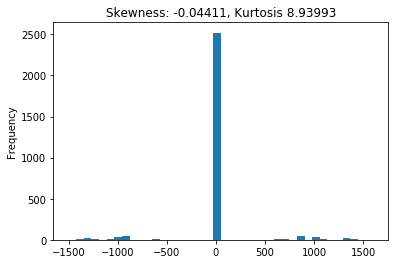

In [25]:
print(trainD['education-num'].describe())
print()
plt.title("Skewness: %.5f, Kurtosis %.5f" % (stats.skew(trainD['education-num']), (stats.kurtosis(trainD['education-num']))))
trainD['education-num'].plot(kind='hist', bins = 40)

Atribúty obsahujú vychýlené hodnoty ktoré je možné opraviť cez vydelenie stomi a záporné hodnoty zmeniť na kladné. Neobsahuje žiadne chýbajúce hodnoty. Taktiež by bolo vhodné pretypovať atribút z float na integer.

# capital-gain / capital-loss / hours-per-week

count     2520.000000
mean       932.840079
std       7190.092535
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital-gain, dtype: float64

count      171.000000
mean     13747.116959
std      24265.998575
min        114.000000
25%       3103.000000
50%       6849.000000
75%      13550.000000
max      99999.000000
Name: capital-gain, dtype: float64


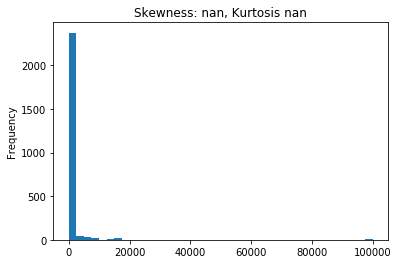

In [26]:
print(trainD['capital-gain'].describe())
print()
filt = trainD[trainD['capital-gain'] > 0]
print(filt['capital-gain'].describe())

plt.title("Skewness: %.5f, Kurtosis %.5f" % (stats.skew(trainD['capital-gain']), (stats.kurtosis(trainD['capital-gain']))))
trainD['capital-gain'].plot(kind='hist', bins = 40)

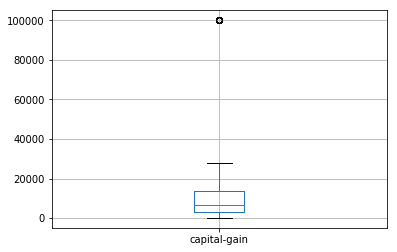

In [27]:
filt.boxplot(column='capital-gain')

Atribúty obsahujú vychýlené hodnoty 99999 (alebo 99 v prípade hours-per-week) ktoré sú buď limitované počtom znakov a v skutočnosti by mohli byt ešte väčšie (v tomto prípade by sa hodnoty neupravovali), alebo je v nich chyba ktorá by sa mohla nahradiť najfrekventovanejšími hodnotami. V prípade capital-gain/loss by sa teda nahradili nulou a hours-per-week by obsahovala číslo 40. Chýbajúce hodnoty by sa taktiež mohli takýmito hodnotami nahradzovať. Len 171 hodnôt je odlišných od nuly z 2520. Atribút hours-per-week obsahuje 1534 hodnôt neobsahujúcich hodnotu 40. Nenulové atribúty capital-gain sa medzi Q1 a Q3 pohybujú medzi 3000 až 13000.

<b>hours-per-week

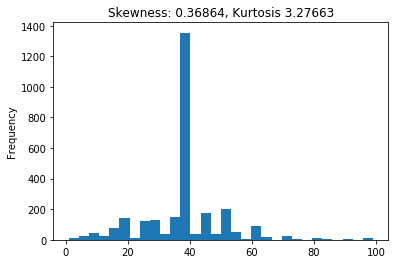

In [28]:
plt.title("Skewness: %.5f, Kurtosis %.5f" % (stats.skew(trainD['hours-per-week']), (stats.kurtosis(trainD['hours-per-week']))))
trainD['hours-per-week'].plot(kind='hist', bins = 30)

In [29]:
print(trainD['hours-per-week'].describe())

count    2800.000000
mean       38.699286
std        12.700817
min         1.000000
25%        35.000000
50%        40.000000
75%        40.000000
max        99.000000
Name: hours-per-week, dtype: float64


In [30]:
filt = trainD[trainD['hours-per-week'] != 40]
print(filt['hours-per-week'].describe())

count    1534.000000
mean       37.625815
std        17.087305
min         1.000000
25%        25.000000
50%        36.000000
75%        50.000000
max        99.000000
Name: hours-per-week, dtype: float64


# Vzťahy atribútov (Kategorický - spojitý)

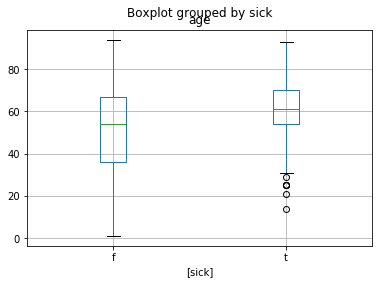

In [31]:
filt = trainD[trainD['age'] < 100]
filt[['sick', 'age']].boxplot(by='sick', )

Z tohoto obrázku je možné vyčítať, v akom rozsahu rokov sú v datasete ľudia chorý. Najväčší počet chorých sa pohybuje medzi 50 a 70 rokmi

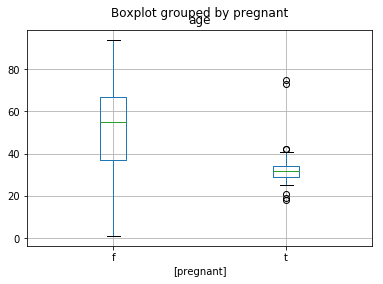

In [32]:
filt[['pregnant', 'age']].boxplot(by='pregnant', )

Tehotné ženy väčšinou pohybujú medzi 30 a 35 rokmi

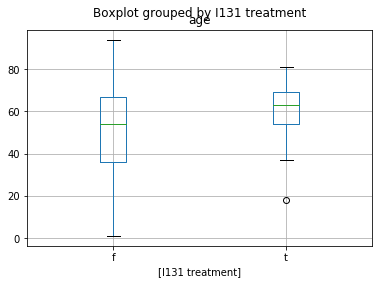

In [33]:
filt[['I131 treatment', 'age']].boxplot(by='I131 treatment', )

Liečba I131 sa vykonáva najmä v 50 až 70 rokoch

In [ ]:
Sultan

Explorative analysis of text tables from the data set,
main purpose of explorative analysis is to understand, visualize, analyse data with the intent of finding missing and wrong values in the data set.
Our dataset which is composed of 40 attributes together, dtype integers, strings. 
We described all the tables individualy to find the missing values and their number.
Inorder to understand the dataset visually too, we plotted some charts, graphs for the tables to see the contents. 



Occupation column 

In [44]:
trainD.occupation.describe()

count              2800
unique               15
top        Adm-clerical
freq                472
Name: occupation, dtype: object

In [45]:
trainD.workclass.describe()


count         2800
unique           9
top        Private
freq          1983
Name: workclass, dtype: object

In [46]:
trainD.workclass.unique()

array([' Private', ' State-gov', ' Local-gov', ' Self-emp-not-inc', ' ?',
       ' Federal-gov', ' Self-emp-inc', ' Without-pay', ' Never-worked'],
      dtype=object)

workclass box plot for the colomn which only show missing calues as '?' and maximum value private which helps us when filling the data with other vlaues

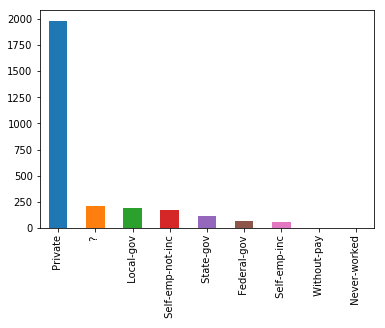

In [82]:
trainD['workclass'].value_counts().plot.bar();

In [84]:
trainD['workclass'].isnull().value_counts()

False    2800
Name: workclass, dtype: int64

In [48]:
a = Counter(trainD.workclass).keys()
b = Counter(trainD.workclass).values()
print(a)
print(b)

dict_keys([' Private', ' State-gov', ' Local-gov', ' Self-emp-not-inc', ' ?', ' Federal-gov', ' Self-emp-inc', ' Without-pay', ' Never-worked'])
dict_values([1983, 113, 195, 171, 206, 69, 60, 2, 1])


Categorical analysis of the data so that we can judge later whether the data is good or bad,  

In [85]:
categorical =trainD.dtypes[trainD.dtypes == "object"].index
print(categorical)

trainD[categorical].describe()

Index(['sex', 'on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured',
       'T3 measured', 'TT4 measured', 'T4U measured', 'FTI measured', 'FTI',
       'TBG measured', 'TBG', 'referral source', 'class', 'workclass',
       'occupation', 'date_of_birth', 'personal_info'],
      dtype='object')


sex on thyroxine query on thyroxine on antithyroid medication  sick  \
count   2800         2800               2800                      2800  2800   
unique     3            6                  2                         2     2   
top        F            f                  f                         f     f   
freq    1830         2217               2760                      2766  2690   

       pregnant thyroid surgery I131 treatment query hypothyroid  \
count      2800            2800           2800              2800   
unique        2               2              2                 2   
top           f               f              f                 f   
freq       2759            2761           2752              2637   

       query hyperthyroid                        ...                          \
count                2800                        ...                           
unique                  2                        ...                           
top                     f                        ...                           
freq                 2627                        ...                           

       FTI measured   FTI TBG measured   TBG referral source           class  \
count          2800  2800         2800  2800            2800            2800   
unique            2   210            1     1              10            2800   
top               t     ?            f     ?           other  negative.|3647   
freq           2505   295         2800  2800            1463               1   

       workclass     occupation date_of_birth  \
count       2800           2800          2799   
unique         9             15          2722   
top      Private   Adm-clerical    1982-07-18   
freq        1983            472             3   

                                            personal_info  
count                                                2800  
unique                                                561  
top     White|United-States\nHS-grad -- Married-civ-sp...  
freq                                                  144  

[4 rows x 29 columns]

Unique ids in the referral soure column.

In [50]:
x = trainD["referral source"].unique()
print(x)

['SVI' 'other' 'SVHC' 'Other' 'SVHD' 'STMW' 'sVI' 'sVHC' 'sTMW' 'sVHD']


Values of the referral source class

In [51]:
Counter(trainD["referral source"]).values()

dict_values([690, 1463, 257, 169, 29, 81, 81, 18, 10, 2])

Most common 5 values which are repeating in the referral source with their numbers in the table

In [86]:
Counter(trainD["referral source"]).most_common(5)

[('other', 1463), ('SVI', 690), ('SVHC', 257), ('Other', 169), ('STMW', 81)]

Sex

In [53]:
counts = trainD.groupby('sex')\
    .sex.value_counts()\
    .to_frame()\
    .rename(columns={'n_w':'n_w'})
counts.head()

sex
sex sex      
?   ?     110
F   F    1830
M   M     860

the chart below shows 3 different values which are in the column, 
as we can see there is only one missing value '?'
the rest 2 are correct

trainD.sex.isnull().value_counts()

sex
sex      
?     110
F    1830
M     860

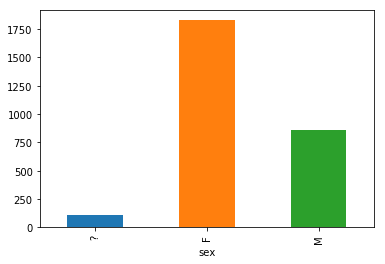

In [54]:
def pretty_plot_top_n(series, top_n=5, index_level=0):
    r = series\
    .groupby(level=index_level)\
    .nlargest(top_n)\
    .reset_index(level=index_level, drop=True)
    r.plot.bar()
    return r.to_frame()


pretty_plot_top_n(counts['sex'])


In [55]:
trainD['on thyroxine'].value_counts()


f        2217
t         303
F         131
FALSE     122
TRUE       16
T          11
Name: on thyroxine, dtype: int64

the plotbar shows the values which needs correction later. 


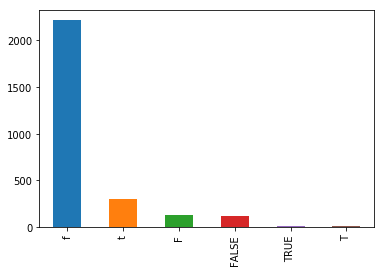

In [56]:
trainD['on thyroxine'].value_counts().plot.bar();

this column is correct and doesn't need any correction

In [57]:
trainD['query on thyroxine'].value_counts()

f    2760
t      40
Name: query on thyroxine, dtype: int64

In [58]:
trainD.sick.value_counts()

f    2690
t     110
Name: sick, dtype: int64

In [59]:
trainD.pregnant.value_counts()

f    2759
t      41
Name: pregnant, dtype: int64

In [60]:
trainD['thyroid surgery'].describe()

count     2800
unique       2
top          f
freq      2761
Name: thyroid surgery, dtype: object

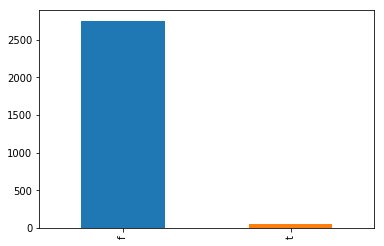

In [61]:
trainD['I131 treatment'].value_counts().plot.bar();

In [62]:
trainD['query hypothyroid'].value_counts()





f    2637
t     163
Name: query hypothyroid, dtype: int64

In [63]:
trainD.lithium.value_counts()

f    2786
t      14
Name: lithium, dtype: int64

In [64]:
trainD.goitre.value_counts()

f    2775
t      25
Name: goitre, dtype: int64

In [65]:
trainD.hypopituitary.value_counts()

f    2799
t       1
Name: hypopituitary, dtype: int64

In [66]:
trainD.hypopituitary.value_counts()

f    2799
t       1
Name: hypopituitary, dtype: int64

In [67]:
trainD['T3 measured'].value_counts()

t    2215
f     585
Name: T3 measured, dtype: int64

In [68]:
trainD['T4U measured'].value_counts()

t    2503
f     297
Name: T4U measured, dtype: int64

In [69]:
trainD['TBG measured'].value_counts()

f    2800
Name: TBG measured, dtype: int64

the other value which has the highest value might be a value which needs some correction. 


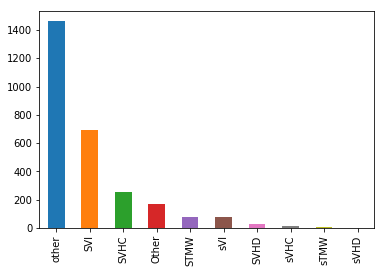

In [70]:
trainD['referral source'].value_counts().plot.bar();

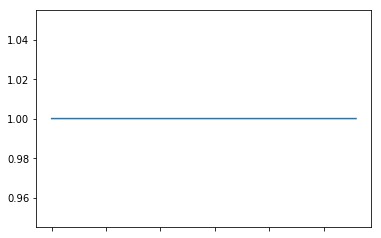

In [71]:
trainD['class'].value_counts().plot()


colored distribution of the table according to the occupation of the employes, 
and shows quite big amount of missig values in the coloumn.

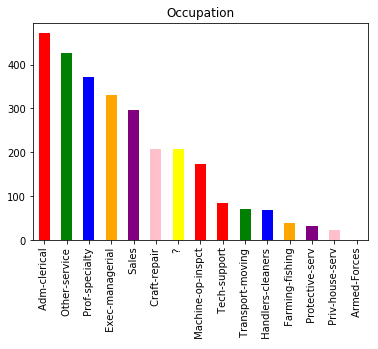

In [75]:
colors = ["red","green","blue","orange","purple","pink","yellow"] 
trainD['occupation'].value_counts().plot(kind='bar',title='Occupation',color=colors)
plt.show()

In [76]:
Counter(trainD.personal_info).most_common(10)

[('White|United-States\nHS-grad -- Married-civ-spouse|Husband', 144),
 ('White|United-States\nSome-college -- Never-married|Own-child', 132),
 ('White|United-States\nHS-grad -- Never-married|Not-in-family', 122),
 ('White|United-States\nBachelors -- Never-married|Not-in-family', 110),
 ('White|United-States\nSome-college -- Married-civ-spouse|Husband', 98),
 ('White|United-States\nBachelors -- Married-civ-spouse|Husband', 93),
 ('White|United-States\nSome-college -- Never-married|Not-in-family', 87),
 ('White|United-States\nHS-grad -- Never-married|Own-child', 81),
 ('White|United-States\nHS-grad -- Divorced|Not-in-family', 70),
 ('White|United-States\nHS-grad -- Divorced|Unmarried', 66)]

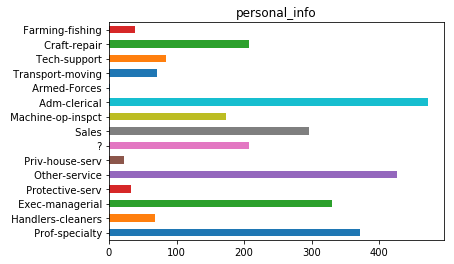

In [90]:
(trainD['occupation']
 .value_counts(sort=False)
 .plot.barh()
 .set_title('personal_info')
)
plt.show()

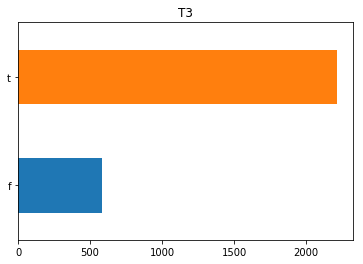

In [92]:
(trainD['T3 measured']
 .value_counts(sort=False)
 .plot.barh()
 .set_title('T3')
)
plt.show()

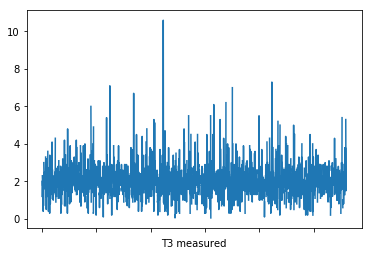

In [94]:
trainD.set_index('T3 measured')['T3'].plot()

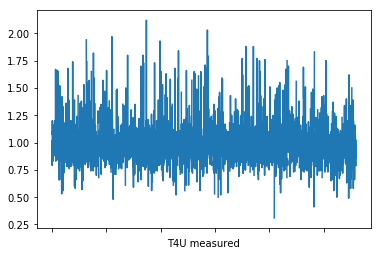

In [97]:
trainD.set_index('T4U measured')['T4U'].plot()

In [ ]:
Densitiy of TT4 values vs T4U values 

Text(0,0.5,'T4U')

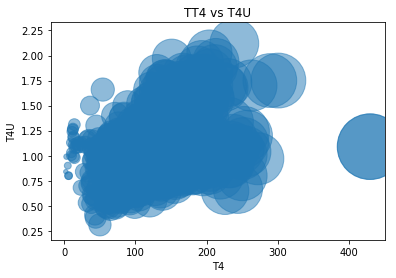

In [110]:
ax = (trainD
    .plot
    .scatter(x='TT4', 
             y='T4U', 
             s=10*trainD['TT4'],
             alpha=.5))
ax.set_title('TT4 vs T4U')
ax.set_xlabel('T4')
ax.set_ylabel('T4U')